In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_data = pd.read_csv('./data/melb_data.csv')
house_data.info()
# 결측치 확인가능
# Dtype 확인(범주형, 문자열 형태의 데이터는 학습이 안됨 -> 수치형으로 변경 : 인코딩)
# Price 컬럼 : 정답


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [3]:
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


Suburb: 주택이 위치한 교외 지역의 이름  
Address: 주택의 주소  
Rooms: 주택의 방 개수  
Type: 주택 유형 (h: 주택, u: 유닛, t: 타운하우스)  
Price: 주택 가격  
Method: 판매 방법 (S: 매매, SP: 매매 후 가격 공개, PI: 경매 전에 가격, VB: 경매 후 가격 공개)  
SellerG: 판매 대행 부동산 중개인의 이름  
Date: 판매 날짜  
Distance: 주택이 CBD (중심 업무 지구)에서 떨어진 거리 (킬로미터 단위)  
Postcode: 우편번호  
Bedroom2: 주택의 침실 개수 (2개의 침실을 갖춘 주택)  
Bathroom: 주택의 욕실 개수  
Car: 주차 가능한 자동차 수  
Landsize: 대지 면적 (평방 미터 단위)  
BuildingArea: 건축 면적 (평방 미터 단위)  
YearBuilt: 주택이 건축된 연도  
CouncilArea: 관할 구역  
Lattitude: 주택의 위도  
Longtitude: 주택의 경도  
Regionname: 지역 이름  
Propertycount: 지역 내의 부동산 개수  

In [4]:
# 결측치가 있는 특성 확인
house_data.isnull().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [5]:
house_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


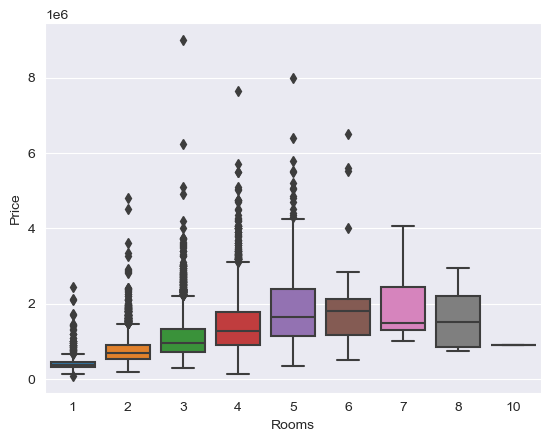

<Figure size 500x300 with 0 Axes>

In [6]:
# Rooms - 방의 개수에 따른 주택가격의 분포현황
sns.boxplot(x='Rooms', y='Price', data=house_data)
plt.figure(figsize=(5, 3))
plt.show()
# 방 개수가 증가할수록 주택 가격의 중앙값 상승
# 하지만 방 6개 이상은 큰 의미가 없어보임
# 이상치 확인가능

In [7]:
# Type 특성의 데이터 종류
house_data['Type'].unique()

array(['h', 'u', 't'], dtype=object)

<Axes: xlabel='Type'>

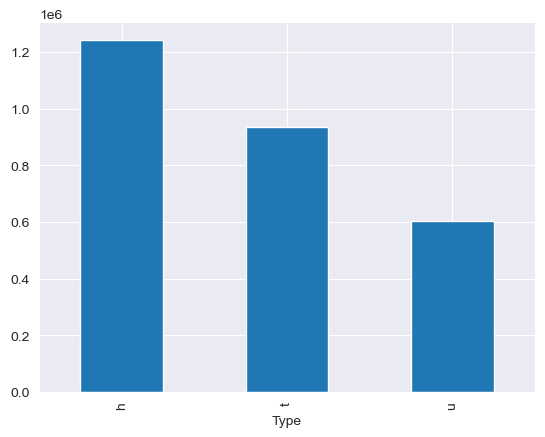

In [8]:
# 타입별로 주택 평균가격 확인
house_data.groupby('Type')['Price'].mean().plot(kind='bar')

<Axes: xlabel='Lattitude', ylabel='Price'>

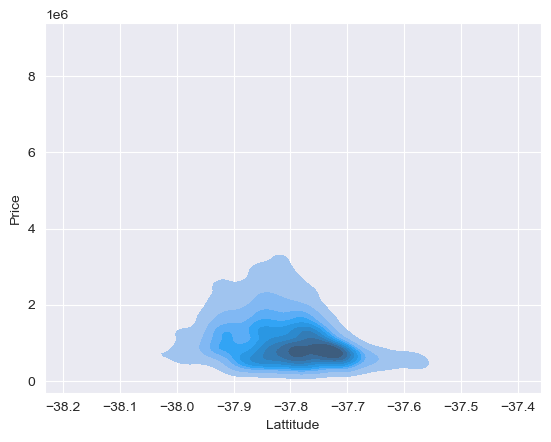

In [9]:
# 위도와 가격에 따른 밀도 확인
# kdeplot : 커널 밀도 추정 그래프
sns.kdeplot(data=house_data, x='Lattitude', y='Price', fill=True)


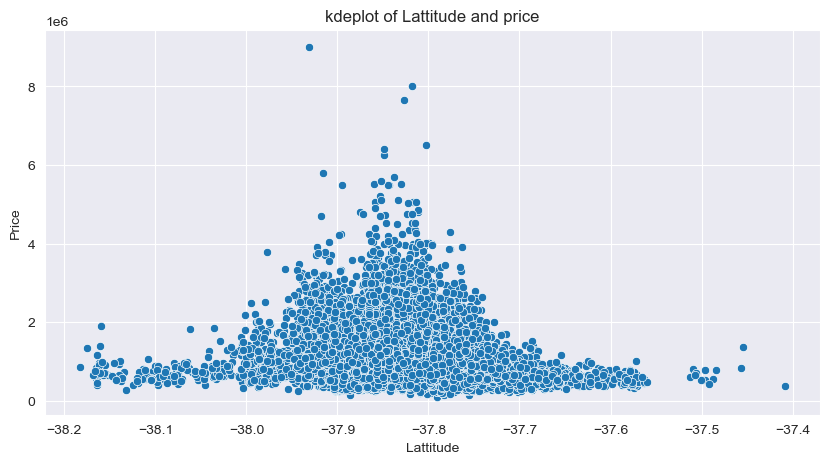

In [10]:
plt.figure(figsize=(10, 5))
plt.title("kdeplot of Lattitude and price")
sns.scatterplot(data=house_data, x='Lattitude', y='Price')
plt.show()

<Axes: xlabel='Longtitude', ylabel='Price'>

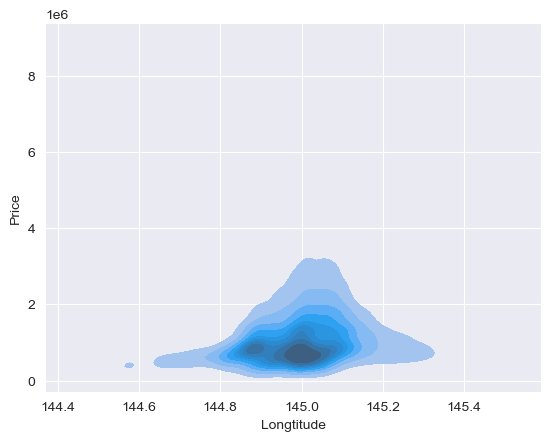

In [11]:
# 경도와 가격에 따른 밀도 확인
# kdeplot : 커널 밀도 추정 그래프
sns.kdeplot(data=house_data, x='Longtitude', y='Price', fill=True)


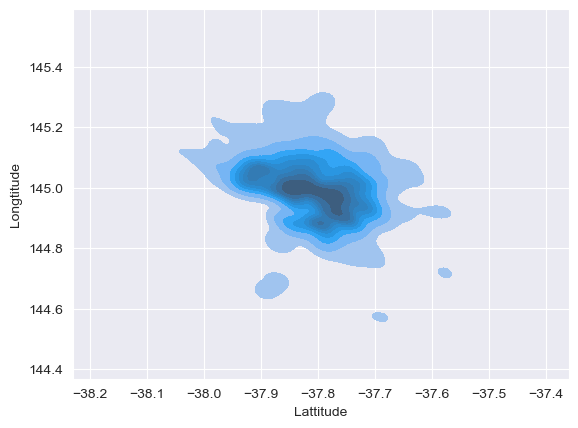

In [12]:
# 위도와 경도에 따른 밀도 확인
# kdeplot : 커널 밀도 추정 그래프
sns.kdeplot(data=house_data, x='Lattitude', y='Longtitude', fill=True)
plt.show()


In [13]:
# Councilarea 값 확인
house_data['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [14]:
len(house_data['CouncilArea'].unique())

34

<Axes: xlabel='count', ylabel='CouncilArea'>

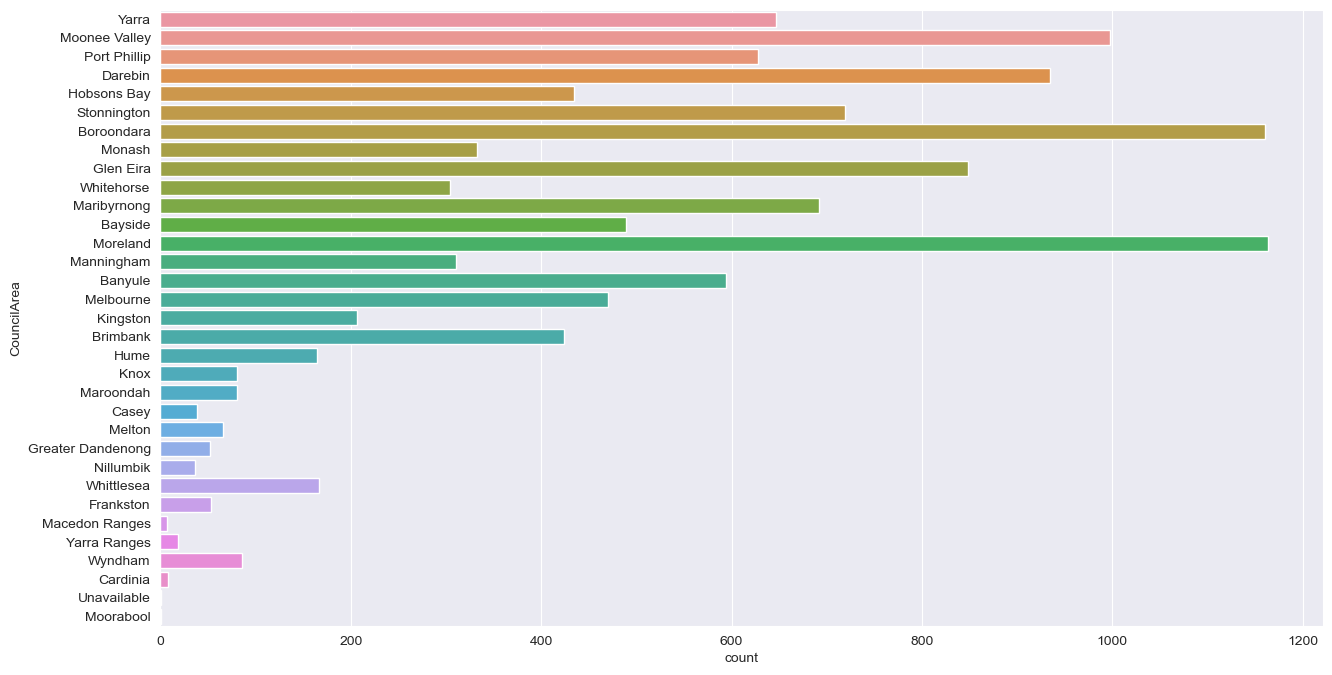

In [15]:
# 관할구역별 주택 수 분포 현황
plt.figure(figsize=(15, 8))
sns.countplot(data=house_data, y='CouncilArea')

In [16]:
house_data['CouncilArea'].value_counts().index

Index(['Moreland', 'Boroondara', 'Moonee Valley', 'Darebin', 'Glen Eira',
       'Stonnington', 'Maribyrnong', 'Yarra', 'Port Phillip', 'Banyule',
       'Bayside', 'Melbourne', 'Hobsons Bay', 'Brimbank', 'Monash',
       'Manningham', 'Whitehorse', 'Kingston', 'Whittlesea', 'Hume', 'Wyndham',
       'Knox', 'Maroondah', 'Melton', 'Frankston', 'Greater Dandenong',
       'Casey', 'Nillumbik', 'Yarra Ranges', 'Cardinia', 'Macedon Ranges',
       'Unavailable', 'Moorabool'],
      dtype='object', name='CouncilArea')

In [17]:
# 결측치를 특정 값으로 채우기 -> fillna()
house_data['CouncilArea'].fillna('Moreland', inplace=True)

In [18]:
house_data['CouncilArea'].isnull().sum()

0

In [19]:
# 전체 컬럼출력
pd.set_option('display.max_columns', None)

In [20]:
house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [21]:
# Suburb(지역이름)을 통하여 CouncilArea(관할구역)컬럼 결측치 채우기
# 지역에 매칭되어 있는 관할구역 수 확인
house_data.pivot_table(index=['Suburb', 'CouncilArea'], values='Rooms', aggfunc='count')

Rooms
Suburb       CouncilArea         
Abbotsford   Moreland           1
             Yarra             55
Aberfeldie   Moonee Valley     40
             Moreland           4
Airport West Moonee Valley     61
...                           ...
Yallambie    Banyule           23
             Moreland           1
Yarra Glen   Yarra Ranges       1
Yarraville   Maribyrnong      154
             Moreland          10

[589 rows x 1 columns]

In [22]:
# 최빈값으로 구성된 테이블 생성
# mode : 최빈값 구하기
mode_data =house_data.groupby('Suburb')['CouncilArea'].agg(pd.Series.mode)
mode_data

Suburb
Abbotsford              Yarra
Aberfeldie      Moonee Valley
Airport West    Moonee Valley
Albanvale            Brimbank
Albert Park      Port Phillip
                    ...      
Wonga Park         Manningham
Wyndham Vale          Wyndham
Yallambie             Banyule
Yarra Glen       Yarra Ranges
Yarraville        Maribyrnong
Name: CouncilArea, Length: 314, dtype: object

In [23]:
# CouncilArea 결측치 채우기
# 단순 기술통계량이 아닌(전체 평균) 연관있는 컬럼을 참고하여 결측 데이터를 채워줌으로써 모델 성능 높이는 것을 기대
# 결측치 채우는 함수 생성
# CouncilArea에 값이 있으면 그대로 사용, 없다면(결측이라면) Suburb에 매칭된 데이터 사용
def fill_councilarea(row):
    if pd.isnull(row['CouncilArea']): # 결측치 일경우
        return mode_data[row['Suburb']]
    return row['CouncilArea']


In [24]:
# apply : df에 커스텀 함수 적용
house_data['CouncilArea'] = house_data.apply(fill_councilarea, axis=1)

In [25]:
house_data['CouncilArea'].isnull().sum()

0

In [26]:
# corr : 상관계수 확인
house_corr = house_data.corr(numeric_only= True)

In [27]:
# 모델링을 위해 컬럼(입력특성) 선택
house_corr['Price'].sort_values(ascending=False)
# 절대값(abs)으로 확인 -> 1에 가까울수록 상관관계가 높다

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64

In [28]:
# 학습에 사용할 입력특성 선택
feature_names = ['Rooms','Bedroom2','Bathroom','Lattitude','Longtitude','Distance','Type','CouncilArea']

-  모델 학습을 위한 데이터 분리
    - 문제데이터(x), 정답데이터(y)
      - 머신러닝 학습을 위해 문제 데이터는 2차원형태
    - 훈련용, 테스트용 데이터 

In [29]:
# 문제 데이터 추출
X = house_data[feature_names]
# 정답 데이터 추출
y = house_data['Price']

In [30]:
# 훈련과 평가용 데이터 분리
from sklearn.model_selection import train_test_split
# train_test_split(문제,정답,분리비율,고정키)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [31]:
# 크기 확인
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9506, 8), (9506,), (4074, 8), (4074,))

### 데이터 전처리
- 문자데이터 -> 수치화(인코딩)
- 인코딩방법 2가지
    1. 원핫인코딩
    2. 레이블인코딩

In [32]:
# 문자열 데이터 확인
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9506 entries, 13253 to 7624
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rooms        9506 non-null   int64  
 1   Bedroom2     9506 non-null   float64
 2   Bathroom     9506 non-null   float64
 3   Lattitude    9506 non-null   float64
 4   Longtitude   9506 non-null   float64
 5   Distance     9506 non-null   float64
 6   Type         9506 non-null   object 
 7   CouncilArea  9506 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 668.4+ KB


In [33]:
# pd.get_dummies(X)
# 오류 : TypeError : unhashable type: 'list' : 'numpy.ndarray'는 해쉬가 불가능
# -> 데이터 내에 numpy 배열이 있어서 오류가 발생, 확인후 제거

In [34]:
# 데이터 타입 확인
X['CouncilArea'] = X['CouncilArea'].astype('str')

In [35]:
X['CouncilArea'] == "[]"

0        False
1        False
2        False
3        False
4        False
         ...  
13575    False
13576    False
13577    False
13578    False
13579    False
Name: CouncilArea, Length: 13580, dtype: bool

In [36]:
# 불리언인덱싱
arr = X[X['CouncilArea'] == "[]"]

In [37]:
# 데이터 삭제
X.drop(arr.index, inplace=True)

In [38]:
X.shape

(13580, 8)

In [39]:
y.drop(arr.index,inplace=True)

In [40]:
y.shape

(13580,)

In [41]:
# 원핫인코딩
X_one_hot = pd.get_dummies(X, dtype='int64')


In [42]:
X_one_hot.head()

,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Distance,Type_h,Type_t,Type_u,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,CouncilArea_Kingston,CouncilArea_Knox,CouncilArea_Macedon Ranges,CouncilArea_Manningham,CouncilArea_Maribyrnong,CouncilArea_Maroondah,CouncilArea_Melbourne,CouncilArea_Melton,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moorabool,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,2.0,1.0,-37.7996,144.9984,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,2.0,1.0,-37.8079,144.9934,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,3.0,2.0,-37.8093,144.9944,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,3.0,2.0,-37.7969,144.9969,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,3.0,1.0,-37.8072,144.9941,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=15)

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9506, 42), (9506,), (4074, 42), (4074,))

In [49]:
# 모델 생성
from sklearn.linear_model import LinearRegression
house_model_linear = LinearRegression()


In [50]:
# 모델 학습
house_model_linear.fit(X_train, y_train)

LinearRegression()

In [51]:
# 가중치, 절편 확인
# 선형함수 : y = wx + b
print('가중치', house_model_linear.coef_, '절편', house_model_linear.intercept_)

가중치 [ 1.74428449e+05  1.50002498e+04  1.84066459e+05 -1.88831387e+06
  5.86501269e+05 -3.79913187e+04  4.29619464e+16  4.29619464e+16
  4.29619464e+16 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15
 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15
 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15
 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15
 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15
 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15
 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15
 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15 -2.88755991e+15
 -2.88755991e+15 -2.88755991e+15] 절편 -4.0074386617065064e+16


In [52]:
# 모델 평가
# score로 점수내주기
print("Linear Score", house_model_linear.score(X_test, y_test))


Linear Score 0.5984233741224456


In [55]:
# 평가지표
from sklearn.metrics import mean_squared_error

In [57]:
linear_pre_test = house_model_linear.predict(X_test)

In [60]:
mean_squared_error(y_test, linear_pre_test)

168296016039.93643

In [61]:
# 제곱값에 제곱근 씌우는 계산 - 실제 단위 가늠할 수 있도록
mean_squared_error(y_test, linear_pre_test) ** 0.5

410238.9743063626

In [74]:
inputnum = input()
numlist = []

for i in inputnum:
    numlist.append(int(i))
    
maxresult = 0
 
for i in range(len(numlist)):
    if numlist[i] == 0 or numlist[i] == 1 or maxresult <= 1:
        maxresult += numlist[i]
    else:
        maxresult *= numlist[i]

print(maxresult)
        

210
